Ce premier TP a pour but de vous familiarisez avec les fonctions de base de manipulation des piles. 

**A la  fin du TP, vous devez déposer votre  fichiers .ipynb dans le dépôt prévu sur
Moodle**

#**I. Fonctions simples de manipulation de piles**

Nous utiliserons la classe Stack_basic dont l'implémentation est donnée ici:


In [ ]:
##Implementation d'une pile basique sans limite de taille ni gestion des erreurs
#permet des opérations de base d'empilage et de dépilage
class Stack_basic:

    def __init__(self):
        self.stack = []

    def pop(self):
        if self.size() < 1:
            return None
        return self.stack.pop()

    def push(self, e):
        self.stack.append(e)

    def size(self):
        return len(self.stack)
    
    def print_stack(self):
        return print(self.stack)

On joue maintenant avec la classe Stack_basic. Exécuter le code suivant et observer les résultats (vous pouvez ajouter d'autres tests si vous le souhaitez)



In [ ]:
ma_pile = Stack_basic()

ma_pile.push(4)
ma_pile.push(8)
ma_pile.push(3) 
print("Contenu de ma pile:")
ma_pile.print_stack() 
print("Taille de ma pile=", ma_pile.size()) # 3
ma_pile.pop() 
print("Taille de ma pile=", ma_pile.size()) # 2
print("Contenu de ma pile:")
ma_pile.print_stack()  

Voici maintenant l'implémentation d'une pile avec une limite de taille. Observer la classe et ses méthodes. 

In [ ]:
import copy
#=====> Implementation avec limite de taille et gestion des erreurs
class Stack:

    def __init__(self, size=-1):  # initialisation de la pile
        self.stack = []
        self.max_size = size

    def push(self, e):
        if len(self.stack) < self.max_size:  # si limite non atteinte, on emplie
            self.stack.append(e)
        else:  # si limite atteinte alors erreur
            print('Empliage de l\'élément', e, 'impossible, taille max dépassée')
            raise RuntimeError

    def pop(self):   #attention, pop ici renvoie le sommet de la pile
        if len(self.stack) > 0: # si pile non vide, dépile
            return self.stack.pop()
        else: #si pile pleine erreur
            print('Dépilage impossible, Pile déjà vide.')
            raise IndexError

    def copier_pile(self) :
      new=Stack(self.size())
      new.stack=self.stack[:]
      new.max_size=self.max_size
      return new
    
    def __str__(self):  #permet l'affichage de la pile, via la fonction native print()
        contenu="le contenu de la pile est : "
        for i in self.stack:
          contenu=contenu+str(i)+ " "
        return contenu
    
    def top(self): #pour récupérer le sommet de la pile
        if len(self.stack) > 0:
            return self.stack[-1]  #sommet dispo si pile non vide
        else:  #sinon erreur
            print('pile vide, pas de sommet.')
            raise IndexError

    def empty(self): # renvoie True si la pile et vide, False sinon
        if len(self.stack)==0:
            return True 
        else:
            return False
    
    def size(self): # renvoie la taille de la pile, -1 si la pile est vide
        if self.empty()==True:
            return -1
        else:
            return len(self.stack)

A vous de jouer. Ajouter des méthodes dans la classe *Stack* qui permettent : 

* de vérifier si une pile est vide
* de donner la taille de pile 

Ces fonctions sont dèjà présentes dans la classe (mais vide), il suffit de compléter le code.






On joue maintenant avec la nouvelle classe pile. Exécuter le code suivant et observer les résultats. Là aussi, vous pouvez ajouter d'autres tests si vous le souhaitez)



In [ ]:
stack = Stack(5)
stack.push(1)  
stack.push(2) 
print('Sommet pile :', stack.top())
print(stack)

q=stack.copier_pile()
print(q)

stack.pop()
stack.pop()


# tester les fonctions empty et size


En utilisant les fonctions de base fournies dans la classe Stack,  ecrire les fonctions suivantes. Ces fonctions sont  à  ecrire en dehors de la classe Stack :
  
* remplir_pile(p) : qui remplie une pile p avec nb entiers donnés au clavier
* echanger(p) : qui permet d'echanger les deux  éléments situés en haut de la pile
* inverser_pile(p) : renvoi une copie inversée de la pile p
* pile_egale(p,q) : vérifie si deux piles p et q sont  egales (i.e., contiennent les mêmes  éléments dans le même ordre).

In [50]:
def remplir_pile(p):
    nb=int(input())
    k=0
    while k<nb:
        n=int(input())
        p.push(n)
        k=k+1
    return p

def echanger(p):
    x=p.pop()
    y=p.pop()
    p.push(x)
    p.push(y)
    return p

def inverser_pile(p):
    q=Stack(p.size())
    for k in range (p.size()):
        x=p.pop()
        q.push(x)
    return q

def pile_egale(p,q):
    if q.size()!= p.size():
        return False
    else:
        k=p.size()
        while k<0:
            x=p.pop()
            y=q.pop()
            if x!=y:
                return False
            return True
            k=k-1




Tester maintenant vos fonctions sur la pile p_test. Pour un meilleur debugage, prévoir des testes au fur et à mesure (i.e., après avoir fini d'implémenter chaque fonction)

In [51]:
#demander à l'utilisateur de saisir la taille de la pile
taille=int(input())
p=Stack(taille)

P=remplir_pile(p)
Q=echanger(p)
print(Q)

print(pile_egale(P,Q))







5
3
1
2
3
le contenu de la pile est : 1 3 2 
None


#**II. Exercices d'application des piles**

**1) Regroupement des éléments d'une pile**

Ecrire une fonction regroupement(p) qui prend en argument une pile p contenant des nombres entiers et qui modifie l’ordre de ses éléments de sorte qu’en fin de traitement les nombres pairs soient situés sous les nombres impairs (on pourra utiliser une pile intermédiaire).

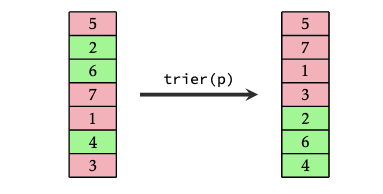

In [68]:
def regroupement(p):
    q=Stack(p.size())
    r=Stack(p.size())
    for k in range (p.size()+1):
        x=p.top()
        if x%2==0:
            q.push(x)
        else:
            r.push(x)
    q=inverser_pile(q)
    r=inverser_pile(r)
    for i in range(r.size()+1):
        q.push(r.top())
    return q
    

In [69]:
#tester votre fonction ici sur la variable pile
pile=Stack(7)
pile.push(3)
pile.push(4)
pile.push(1)
pile.push(7)
pile.push(6)
pile.push(2)
pile.push(5)

print(pile)

print(regroupement(pile))


le contenu de la pile est : 3 4 1 7 6 2 5 
Empliage de l'élément 5 impossible, taille max dépassée


RuntimeError: 


**2) Tri d'une pile**

a-- Ecrire une fonction inserer(e,p) qui prend en entrée une pile triée dans l’ordre croissant et un nombre e, et qui insère e dans la pile de telle sorte qu’elle soit toujour  triée dans l’ordre croissant. (On pourra utiliser une pile intermédiaire)

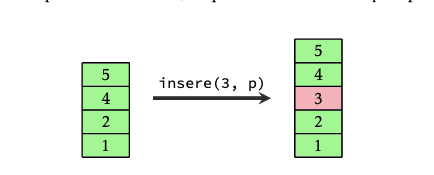

b -- En déduire un algorithme de tri d’une pile quelconque.
Encore une fois, on pourra utiliser un pile auxiliaire.

In [ ]:
# ecrire vos fonctions ici

In [ ]:
#tester votre fonction ici
pile=Stack(10)
pile.push(1)
pile.push(2)
pile.push(4)
pile.push(5)

#appeler votre fonction inserer ici


# appeler votre fonction tri ici


**3) Pile et palindromes**

Un palindrome est un mot qui se lit de la même façon de gauche à droite et de droite à gauche. Par exemple, abababa est un palindrome, kayak et coloc en sont deux autres.

Implémenter à l’aide d’une pile un programme qui prend en entrée un mot et renvoie True si c’est un palindrome et False sinon.

In [ ]:
# ecrire vos fonctions ici

In [ ]:
#tester  votre fonction ici

mot="kayac" #mettre votre mot ici
liste_mot=list(mot)  #transforme le mot en liste pour pouvoir itérer sur la liste et remplir la pile
print(liste_mot)
